In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample Data (replace with your actual data)
data = {
    'Feature1': [10, 20, 15, 25, 30, 12, 22, 18],
    'Feature2': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B'],
    'Target': [0, 1, 0, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)



In [2]:
df

,Feature1,Feature2,Target
0,10,A,0
1,20,B,1
2,15,A,0
3,25,C,1
4,30,B,1
5,12,A,0
6,22,C,1
7,18,B,0


In [3]:
# Encode categorical features
df['Feature2'] = df['Feature2'].astype('category').cat.codes

In [4]:
df

,Feature1,Feature2,Target
0,10,0,0
1,20,1,1
2,15,0,0
3,25,2,1
4,30,1,1
5,12,0,0
6,22,2,1
7,18,1,0


In [5]:
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,Feature1,Feature2
0,10,0
7,18,1
2,15,0
4,30,1
3,25,2
6,22,2


In [7]:
# Initialize and train the classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


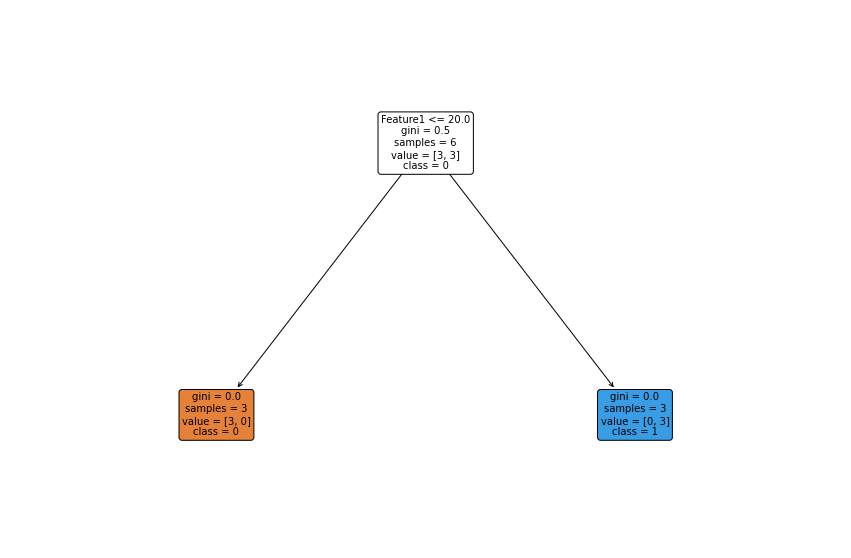

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_names = ['Feature1', 'Feature2_encoded'] 
class_names = [str(name) for name in dt_classifier.classes_]

# Create a figure and plot the tree
plt.figure(figsize=(15, 10))
plot_tree(
    dt_classifier, 
    feature_names=feature_names, 
    class_names=class_names, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.show()